# 基于上证指数行情数据的基本分布分析
> v0.1
> 
> 20160416
> 
> 主要是涨幅和价格的分析

导入模块

In [1]:
import tushare as ts
import pylab
import pandas as pd
import numpy as np
%matplotlib inline
code1='sh'
code2='000001'

### 获得基础信息

In [2]:
ind=ts.get_index()
ind

,code,name,change,open,preclose,close,high,low,volume,amount
0,000001,上证指数,-1.44,3058.4629,3078.1166,3033.6604,3058.4629,3022.9701,183304512,2086.1309
1,000002,Ａ股指数,-1.45,3200.7127,3221.3384,3174.7592,3200.7127,3163.5444,182805200,2082.3012
2,000003,Ｂ股指数,-1.05,380.1539,381.0027,376.9998,380.1539,376.0425,499312,3.8296
3,000008,综合指数,-1.08,2672.0616,2689.5274,2660.3965,2672.0808,2656.0173,46914387,547.6994
4,000009,上证380,-1.74,5566.4126,5603.6921,5506.2015,5566.4126,5473.2411,55255067,650.9533
5,000010,上证180,-1.33,6994.0475,7039.3256,6945.8334,6994.0475,6940.0207,68067285,691.6577
6,000011,基金指数,-0.39,5684.4811,5691.7921,5669.3338,5684.4811,5666.0849,12776877,326.7563
7,000012,国债指数,0.03,156.8008,156.7556,156.8044,156.8052,156.7246,194671,2.0627
8,000016,上证50,-1.09,2166.0031,2182.0667,2158.2302,2168.8968,2154.3812,24410918,258.0037
9,000017,新综指,-1.45,2581.0554,2597.6936,2560.0735,2581.0554,2551.0251,182656620,2080.7720


### 获得近三年的日线数据

In [3]:
dp=ts.get_hist_data(code1)
dp[:5]

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2016-04-18,3058.46,3058.46,3033.66,3022.97,1833045.12,-44.46,-1.44,3056.886,3041.543,3013.785,2147754.60,2191712.16,2232932.74
2016-04-15,3085.03,3089.95,3078.12,3066.87,1896130.50,-4.24,-0.14,3056.946,3039.130,3009.859,2221182.22,2214953.51,2297946.85
2016-04-14,3080.09,3086.70,3082.36,3056.99,2082378.25,15.72,0.51,3038.314,3031.710,3001.195,2217765.40,2245753.91,2303285.43
2016-04-13,3041.36,3097.16,3066.64,3041.36,3100032.50,42.99,1.42,3023.526,3023.538,2990.598,2243128.75,2247887.54,2292412.79
2016-04-12,3031.30,3036.82,3023.65,3001.32,1827186.62,-10.31,-0.34,3020.316,3008.857,2980.485,2087646.35,2120849.64,2219104.49


### 获得涨幅数据列，并绘制涨幅分布图

最小值： -8.49
最大值： 5.76
平均值： 0.0578159340659
标准差： 1.79948388877


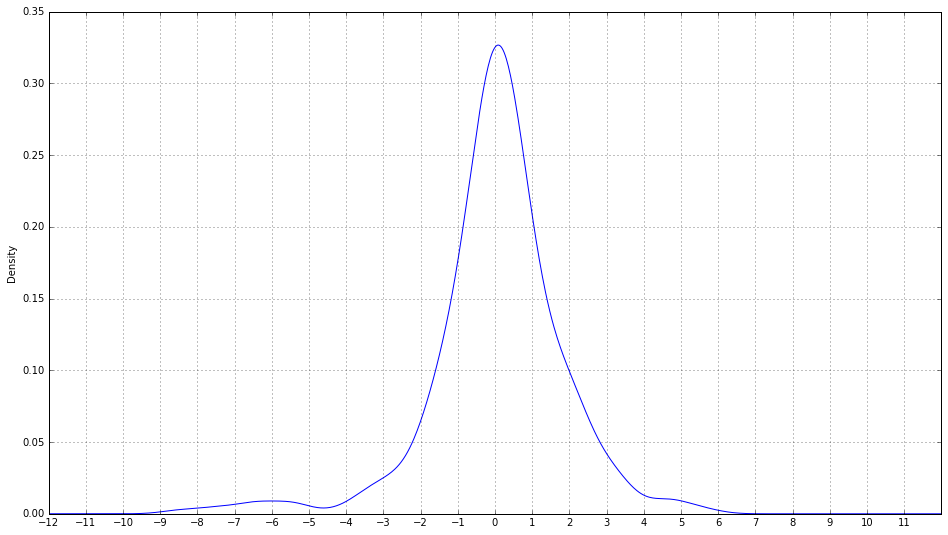

In [4]:
pc=dp.p_change
pxt=np.arange(-12,12,1)
pxl=[-12,12]
pc.plot(kind='kde',grid=True,figsize=(16,9),xticks=pxt,xlim=pxl)
print '最小值：',pc.min()
print '最大值：',pc.max()
print '平均值：',pc.mean()
print '标准差：',pc.std()

-  

-  

### 近20日的涨幅数据及分布图

最小值： -1.63
最大值： 2.77
平均值： 0.139
标准差： 1.24570799992


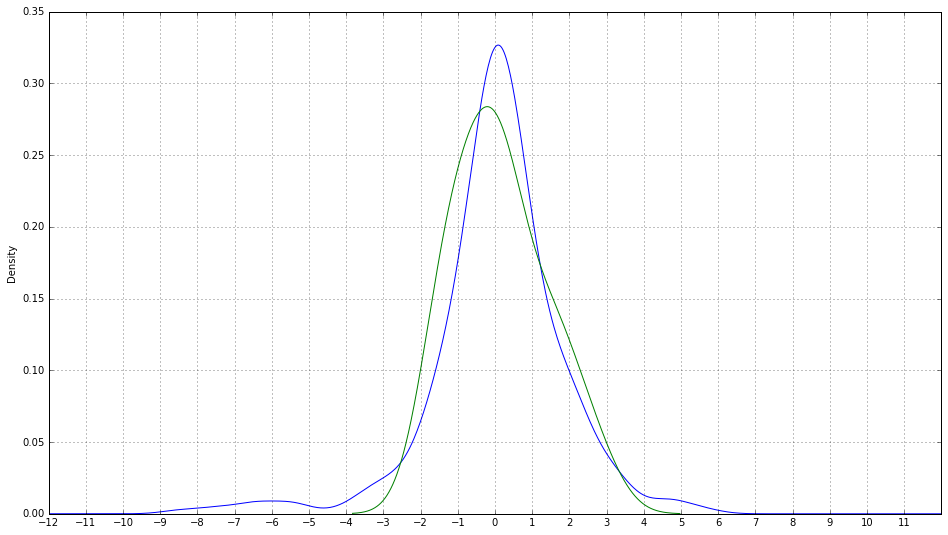

In [5]:
pc20=dp[:20].p_change
pc.plot(kind='kde',grid=True,figsize=(16,9),xticks=pxt,xlim=pxl)
pc20.plot(kind='kde',grid=True,figsize=(16,9),xticks=pxt,xlim=pxl)
print '最小值：',pc20.min()
print '最大值：',pc20.max()
print '平均值：',pc20.mean()
print '标准差：',pc20.std()

- 根据月内数据与三年数据的比较，判断近期行情的重心

### 分析三年数据的收盘价分布情况

最小值： 1950.013
最大值： 5166.35
平均值： 2780.14462363
标准差： 786.860480417


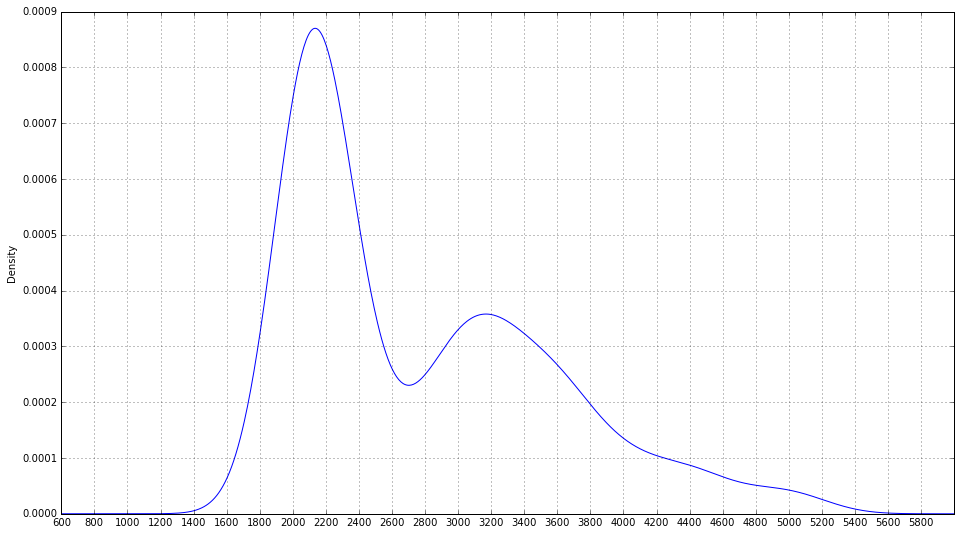

In [6]:
close=dp.close
cxt=np.arange(600,6000,200)
cxl=[600,6000]
close.plot(kind='kde',grid=True,figsize=(16,9),xticks=cxt,xlim=cxl)
print '最小值：',close.min()
print '最大值：',close.max()
print '平均值：',close.mean()
print '标准差：',close.std()

- 此图基本反应了 

 - 

 -  

近20日收盘价分布情况对比

最小值： 2919.83
最大值： 3082.36
平均值： 3013.7845
标准差： 41.5220364417


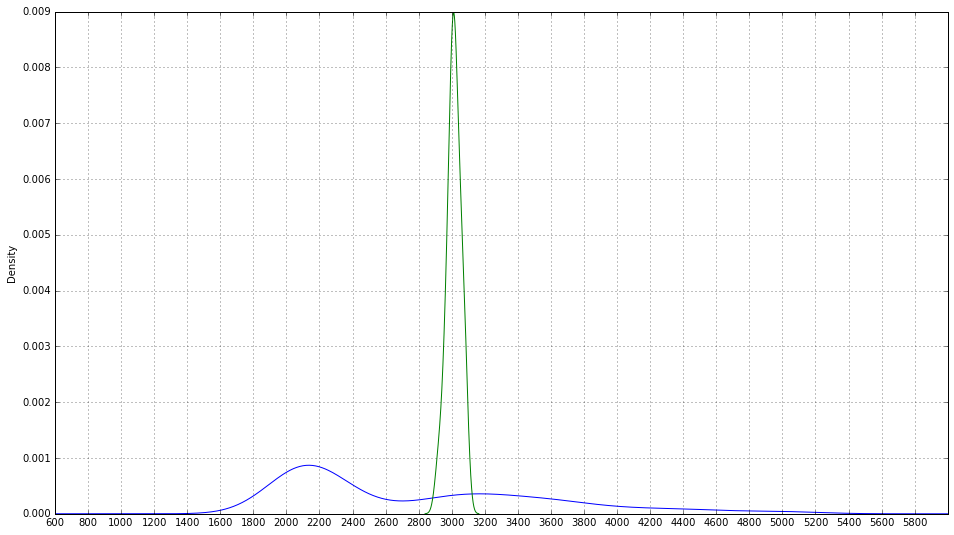

In [7]:
close20=dp[:20].close
close.plot(kind='kde',grid=True,figsize=(16,9),xticks=cxt,xlim=cxl)
close20.plot(kind='kde',grid=True,figsize=(16,9),xticks=cxt,xlim=cxl)
print '最小值：',close20.min()
print '最大值：',close20.max()
print '平均值：',close20.mean()
print '标准差：',close20.std()

近20日的收盘价数据与三年数据的对比，判断目前价格位置

### 对全部数据的收盘价分析

#### 获取全部数据（从2000年1月1日起）

In [8]:
df=ts.get_h_data(code2,start='2000-01-01',index=1) 
df[:5]

[Getting data:]#################################################################

,open,high,close,low,volume,amount
date,,,,,,
2016-04-15,3085.026,3089.951,3078.117,3066.872,18961305100,224141313373
2016-04-14,3080.090,3086.698,3082.362,3056.989,20823783000,235056056274
2016-04-13,3041.358,3097.165,3066.638,3041.358,31000324600,331420683224
2016-04-12,3031.301,3036.825,3023.646,3001.315,18271866800,207079807862
2016-04-11,3006.909,3048.977,3033.957,3006.909,22001832400,252328393482


简单分析

In [9]:
df.describe()

,open,high,close,low,volume,amount
count,3940.000000,3940.000000,3940.000000,3940.000000,3.940000e+03,3.940000e+03
mean,2327.436616,2350.633138,2329.386344,2302.487715,8.953960e+09,9.652823e+10
std,926.098928,940.142237,927.042352,909.040942,1.138364e+10,1.466821e+11
min,1007.901000,1019.922000,1011.499000,998.228000,2.497117e+08,2.659838e+09
25%,1636.636750,1650.014500,1635.417250,1619.684000,1.395043e+09,1.083111e+10
50%,2127.039500,2138.344500,2127.195000,2109.178000,6.064934e+09,5.782025e+10
75%,2831.056000,2864.322500,2835.600500,2791.818500,1.135084e+10,1.169853e+11
max,6057.428000,6124.044000,6092.057000,6040.713000,8.571328e+10,1.309925e+12


收盘价分析

最小值： 1011.499
最大值： 6092.057
平均值： 2329.38634416
标准差： 927.042351624


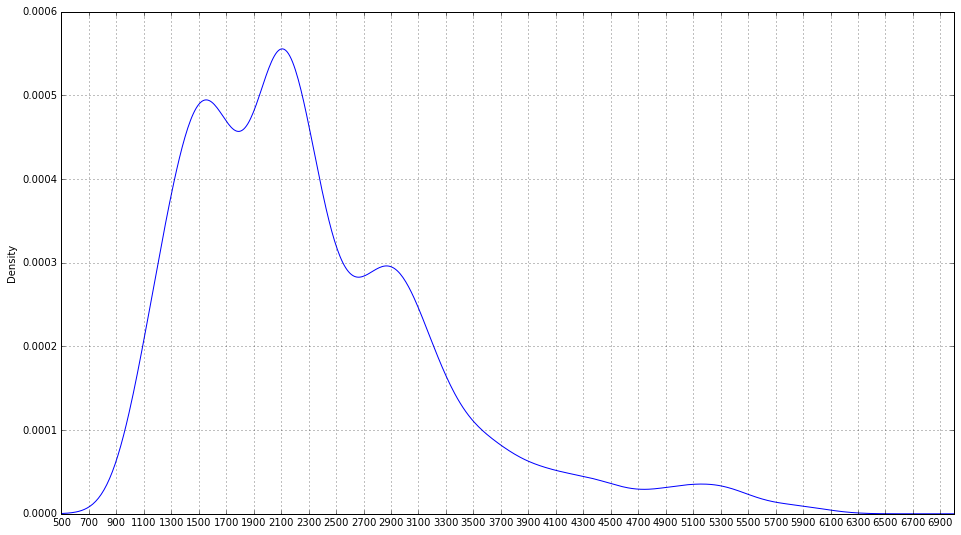

In [10]:
closeall=df.close
nxt=np.arange(500,7000,200)
nxl=[500,7000]
closeall.plot(kind='kde',grid=True,figsize=(16,9),xticks=nxt,xlim=nxl)
print '最小值：',closeall.min()
print '最大值：',closeall.max()
print '平均值：',closeall.mean()
print '标准差：',closeall.std()

- 除权数据的分析中，价格范围相比三年数据扩大不多。特点为：

 -  
 
 -  
 
  -  

与20日收盘价对比

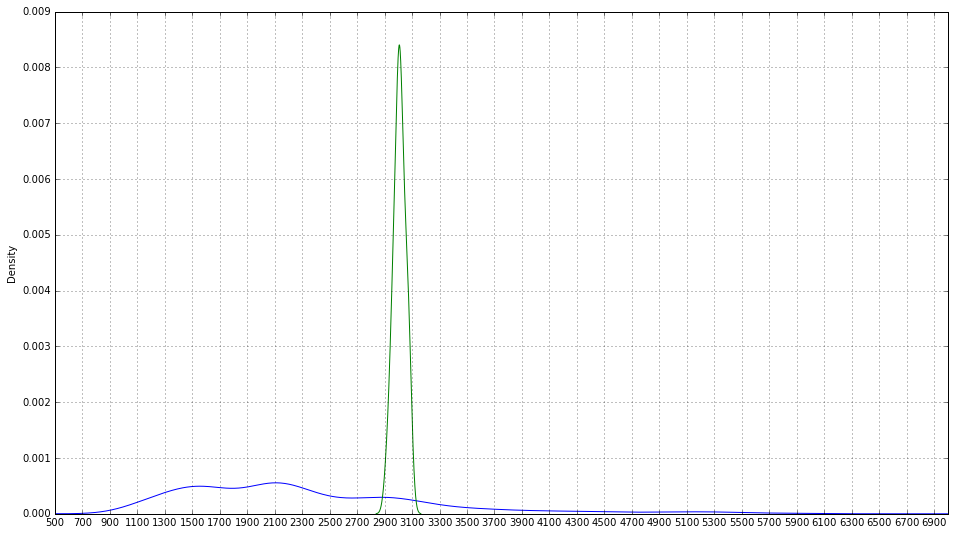

In [11]:
closeall20=df[:20].close
closeall.plot(kind='kde',grid=True,figsize=(16,9))
closeall20.plot(kind='kde',grid=True,figsize=(16,9),xticks=nxt,xlim=nxl)

*三个月多阶段对比*

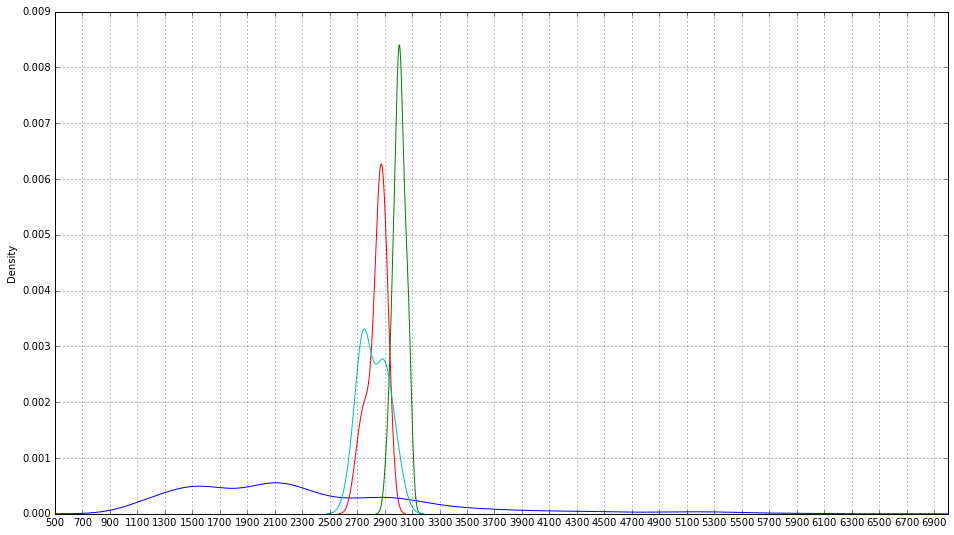

In [12]:
closeall40=df[20:40].close
closeall60=df[40:60].close
closeall.plot(kind='kde',grid=True,figsize=(16,9))
closeall20.plot(kind='kde',grid=True,figsize=(16,9))
closeall40.plot(kind='kde',grid=True,figsize=(16,9))
closeall60.plot(kind='kde',grid=True,figsize=(16,9),xticks=nxt,xlim=nxl)

In [13]:
closeall20.describe()

count      20.000000
mean     3009.858800
std        43.219668
min      2919.832000
25%      2983.577000
50%      3008.975000
75%      3038.115750
max      3082.362000
Name: close, dtype: float64

In [14]:
closeall40.describe()

count      20.00000
mean     2845.40290
std        67.41389
min      2687.97900
25%      2808.91175
50%      2861.28850
75%      2898.35175
max      2928.89600
Name: close, dtype: float64

In [15]:
closeall60.describe()

count      20.000000
mean     2822.429350
std       100.295244
min      2655.661000
25%      2744.458750
50%      2808.797000
75%      2904.186750
max      3007.739000
Name: close, dtype: float64

### 三年数据和全部数据的基本统计对比

- 三年数据：

In [16]:
dp.describe()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
count,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000
mean,2775.165893,2806.871824,2780.144624,2744.273033,2430482.786016,1.083107,0.057816,2777.850518,2774.995420,2769.500713,2427526.736841,2423166.947060,2414396.226648
std,785.402521,803.369906,786.860480,762.927508,1744876.832963,62.201328,1.799484,785.163962,783.219969,778.798368,1698226.460074,1674299.818721,1646774.116280
min,1935.516000,1959.158000,1950.013000,1849.653000,562712.500000,-345.350000,-8.490000,1960.691000,1980.786000,2002.162000,647227.650000,678771.960000,706663.490000
25%,2103.139250,2114.249000,2103.645000,2092.821500,1049009.832500,-16.342250,-0.630000,2103.467500,2100.747500,2096.039000,1066323.930000,1072576.185000,1046379.650000
50%,2362.060000,2381.079000,2369.519500,2351.300000,1838869.065000,2.817500,0.115000,2360.978500,2354.697000,2347.002000,1888493.505000,1921047.000000,1908706.595000
75%,3300.038250,3347.798500,3311.902250,3277.439000,3282321.187500,22.526250,0.880000,3298.857000,3292.726250,3291.509000,3246690.737500,3306863.725000,3353657.595000
max,5174.418000,5178.191000,5166.350000,5103.401000,8571328.000000,224.190000,5.760000,5127.879000,5052.792000,4925.927000,7287151.900000,6936105.500000,6499392.930000


- 全部前复权数据：

In [17]:
df.describe()

,open,high,close,low,volume,amount
count,3940.000000,3940.000000,3940.000000,3940.000000,3.940000e+03,3.940000e+03
mean,2327.436616,2350.633138,2329.386344,2302.487715,8.953960e+09,9.652823e+10
std,926.098928,940.142237,927.042352,909.040942,1.138364e+10,1.466821e+11
min,1007.901000,1019.922000,1011.499000,998.228000,2.497117e+08,2.659838e+09
25%,1636.636750,1650.014500,1635.417250,1619.684000,1.395043e+09,1.083111e+10
50%,2127.039500,2138.344500,2127.195000,2109.178000,6.064934e+09,5.782025e+10
75%,2831.056000,2864.322500,2835.600500,2791.818500,1.135084e+10,1.169853e+11
max,6057.428000,6124.044000,6092.057000,6040.713000,8.571328e+10,1.309925e+12
